In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
import mylibrary.datasets as datasets
import mylibrary.splinelib as spline
import matplotlib
%matplotlib inline

In [2]:
default0 = plt.rcParams['figure.figsize']
default0

[6.0, 4.0]

(400, 2) (400, 1)


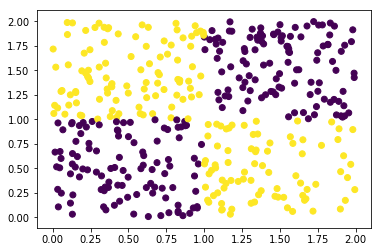

In [3]:
T = 1.
F = 0.

xxx = np.array([[F, F],
      [F, T],
      [T, F],
      [T, T],])
yyy = np.array([[F],[T],[T],[F]])

x = []
y = []
n_data = 400
for i in range(n_data):
    index = np.random.randint(low=0, high=4)
    xx = xxx[index] + np.random.uniform(low=0., high=1, size=xxx[0].size)
#     xx = xxx[index] + np.random.normal(loc=0., scale=0.21, size=xxx[0].size)
    x.append(xx)
    y.append(yyy[index])
x, y = np.array(x), np.array(y)
print(x.shape, y.shape)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1))

In [4]:
colors = ['r', 'y', 'g', 'b']
h = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), h), np.arange(x[:,1].min(), x[:,1].max(), h))
xxyy = np.c_[xx.ravel(), yy.ravel()]

In [26]:
input_size = 2
hidden_1 = 2
output_size = 1
learning_rate = 0.001

optimizer = tnn.Adam(learning_rate)
layer1 = tnn.LinearLayer(input_size, hidden_1, optimizer=optimizer)
layer2 = spline.SplineVectorLayer(hidden_1, max_points=3)  # 2 -> Linear; 3 -> DoubleRelu
layer3 = tnn.NonLinearLayer(hidden_1, output_size, activation=tnn.Sigmoid(), optimizer=optimizer)

layer3_res = tnn.WeightsLayer(hidden_1, hidden_1-output_size, optimizer=optimizer)
layer3_resT = tnn.WeightsLayer(hidden_1-output_size, hidden_1)
# layer3_resT.weights = np.vstack([layer3_res.weights.T, layer3.weights.T])
layer3_resT.weights = layer3_res.weights.T

In [27]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(20000):
    a1 = layer1.forward(x)
    a2 = layer2.forward(a1)
    yout = layer3.forward(a2)
        
    loss = tnn.CrossEntropyBinary.loss(yout, y)
    dy = tnn.CrossEntropyBinary.del_loss(yout, y)
    
    da2 = layer3.backward(dy)
    da1 = layer2.backward(da2)
    dx = layer1.backward(da1)

    res = layer3_res.forward(a2)
    a20_ = layer3_resT.forward(res)
    a21_ = (layer3.zee-layer3.bias)@np.linalg.pinv(layer3.weights)
    a2_ = a20_+ a21_
    
    loss2 = tnn.MseLoss.loss(a2_, a2)
    da2_ = tnn.MseLoss.del_loss(a2_, a2)
    
    dres = layer3_resT.backward(da2_)
    da2 = layer3_res.backward(dres)
    
    
    
    layer1.update()
    layer2.update()
    layer3.update()
    layer3_res.update()
    layer3_resT.weights = layer3_res.weights.T
  
    
    if step % 100 == 0:
        layer2._maintain_good_spline_()
        
        print('-------------------------')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()        
        a1 = layer1.forward(xxyy)
        a2 = layer2.forward(a1)
        classxy = layer3.forward(a2)
        classxyi = (classxy > 0.5).astype(int)
        plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   alpha=0.5,
                   aspect='auto', origin='lower')
        plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')            
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

-------------------------
epoch 0
Loss 1.5167116615212415

-------------------------
epoch 100
Loss 0.9195851049591173

-------------------------
epoch 200
Loss 0.7574694492460523

-------------------------
epoch 300
Loss 0.7274537833446799

-------------------------
epoch 400
Loss 0.7121375531003014

-------------------------
epoch 500
Loss 0.7017168747612469

-------------------------
epoch 600
Loss 0.6948439188040461

-------------------------
epoch 700
Loss 0.6902833506628718

-------------------------
epoch 800
Loss 0.6872574445305384

-------------------------
epoch 900
Loss 0.6851671352786473

-------------------------
epoch 1000
Loss 0.6836003521226865

-------------------------
epoch 1100
Loss 0.6822218433149045

-------------------------
epoch 1200
Loss 0.6806971990635071

-------------------------
epoch 1300
Loss 0.6787658594335317

-------------------------
epoch 1400
Loss 0.6761779365087599

-------------------------
epoch 1500
Loss 0.6726595981915634

--------------------

/media/tsuman/98D2644AD2642EA6/Neural_Network/Notebooks/Experimentals/Credit_Assignment/Spline_Neural_Net_dynamic/mylibrary/nnlib.py:36: RuntimeWarning: divide by zero encountered in log
  return -((target * np.log(output) + (1 - target) * np.log(1 - output)).sum(axis=1)).mean()
/media/tsuman/98D2644AD2642EA6/Neural_Network/Notebooks/Experimentals/Credit_Assignment/Spline_Neural_Net_dynamic/mylibrary/nnlib.py:36: RuntimeWarning: invalid value encountered in multiply
  return -((target * np.log(output) + (1 - target) * np.log(1 - output)).sum(axis=1)).mean()


-------------------------
epoch 9500
Loss nan

-------------------------
epoch 9600
Loss nan

-------------------------
epoch 9700
Loss nan

-------------------------
epoch 9800
Loss nan

-------------------------
epoch 9900
Loss nan

-------------------------
epoch 10000
Loss nan

-------------------------
epoch 10100
Loss nan

-------------------------
epoch 10200
Loss nan

-------------------------
epoch 10300
Loss nan

-------------------------
epoch 10400
Loss nan

-------------------------
epoch 10500
Loss nan

-------------------------
epoch 10600
Loss nan

-------------------------
epoch 10700
Loss nan

-------------------------
epoch 10800
Loss nan

-------------------------
epoch 10900
Loss nan

-------------------------
epoch 11000
Loss nan

-------------------------
epoch 11100
Loss nan

-------------------------
epoch 11200
Loss nan

-------------------------
epoch 11300
Loss nan

-------------------------
epoch 11400
Loss nan

-------------------------
epoch 11500
Loss na

In [28]:
loss2

1.1443332818130961e-10

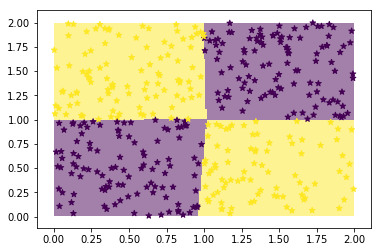

In [29]:
%matplotlib inline
a1 = layer1.forward(xxyy)
a2 = layer2.forward(a1)
classxy = layer3.forward(a2)
classxyi = (classxy > 0.5).astype(int)
plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           alpha=0.5,
           aspect='auto', origin='lower')
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')  

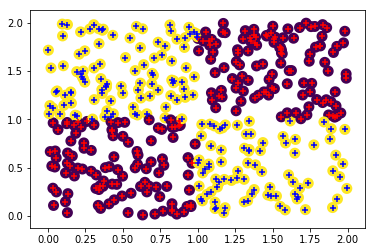

In [30]:
a1 = layer1.forward(x)
a2 = layer2.forward(a1)
yout = layer3.forward(a2)
out = (yout>0.5).astype(int)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))

## Visualize neural network layers 

In [31]:
layer3.input.shape

(400, 2)

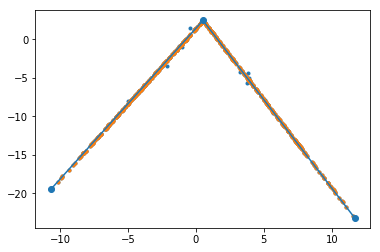

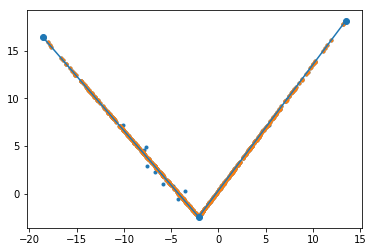

In [32]:
for i in range(layer3.input.shape[1]):
    a1 = layer2.input
    a2 = layer3.input
    da2 = layer2.del_output
    a2_ = a2 - da2
    plt.scatter(a1[:, i], a2_[:, i], marker='.')
    plt.scatter(a1[:, i], a2[:, i], marker='.')
    plt.plot(layer2.spline_list[i].X,  layer2.spline_list[i].Y, marker='o')
    da2[:,i].mean(), da2[:,i].var()
    plt.show()

In [33]:
da2.mean(axis=0)

array([4.19720817e-05, 5.04624215e-05])

In [34]:
da2.std(axis=0)

array([0.08784443, 0.10561408])

In [35]:
# layer2._increase_pieces_()

## Reverse Propagation

#### Reversing over sigmoid

In [37]:
pred = layer3.output > 0.5

In [38]:
def logit(x, epsilon=1e-15):
    x = np.clip(x, epsilon, 1-epsilon)
    y = np.log(x/(1-x))
    return y

In [39]:
l3z_ = logit(layer3.output)# - layer3.del_output)

In [40]:
pred_ = tnn.Sigmoid().forward(l3z_) > 0.5
(pred != pred_).astype(int).sum()  # number of mistakes made
# pred - pred_

0

#### Reversing over layer 3 and layer3_res

In [41]:
l3wi = np.linalg.pinv(layer3.weights)
layer3.weights, l3wi

(array([[ 9.83416746],
        [11.8234231 ]]), array([[0.04158137, 0.04999245]]))

In [43]:
l2a_0 = (layer3.zee - layer3.bias)@l3wi

In [44]:
## Residual required for matrix inversion
res

array([[ 1.16594829e+01],
       [ 5.45357228e+00],
       [ 1.66122562e+01],
       [ 3.99300119e+00],
       [ 1.06948312e+01],
       [ 6.85864735e+00],
       [ 6.24606370e+00],
       [ 4.39098973e+00],
       [ 1.62708795e+01],
       [ 5.91387847e+00],
       [ 6.72988636e+00],
       [ 1.81924442e+00],
       [ 9.06633925e+00],
       [ 1.03751251e+01],
       [ 1.77223627e+01],
       [ 2.60395663e+00],
       [ 1.33083545e+00],
       [ 1.26749607e+01],
       [ 8.55240683e+00],
       [ 1.58678036e+01],
       [ 5.12663029e+00],
       [ 8.51721384e+00],
       [ 6.28339845e+00],
       [ 4.23465157e+00],
       [ 6.08285352e+00],
       [ 1.43726875e+01],
       [ 5.16312890e+00],
       [ 5.44434771e+00],
       [ 5.25628071e+00],
       [ 1.57760632e+01],
       [ 3.06194803e-01],
       [ 7.45440843e+00],
       [ 1.37451070e+01],
       [ 1.34683639e+01],
       [ 3.31122159e+00],
       [ 7.87094169e+00],
       [ 1.60454183e+01],
       [ 1.45600413e+01],
       [ 9.1

In [45]:
l2a_1 = layer3_resT.forward(res)
l2a_ = l2a_0 + l2a_1

In [46]:
pred1_ = tnn.Sigmoid().forward(l2a_@layer3.weights + layer3.bias) > 0.5
(pred != pred1_).astype(int).sum()

0

In [47]:
pred1_ = tnn.Sigmoid().forward(layer2.output@layer3.weights + layer3.bias) > 0.5
(pred != pred1_).astype(int).sum()

0

In [49]:
(np.abs(layer2.output - l2a_)).mean()  ## here was the most loss in information backward
## NOW SOLVED

0.00024209789799146592

#### Reversing over layer 2

In [50]:
layer2.output - l2a_

array([[-2.46020780e-04,  2.13773798e-04],
       [-3.74924600e-04,  3.16122242e-04],
       [-3.86646430e-04,  3.34624379e-04],
       [-2.64353316e-04,  2.23008626e-04],
       [-3.12644939e-04,  2.68432003e-04],
       [-3.74831758e-04,  3.17147110e-04],
       [-3.18112430e-04,  2.69490151e-04],
       [-2.50456055e-04,  2.11761706e-04],
       [-3.36304206e-04,  2.92484321e-04],
       [-1.68615207e-04,  1.44884836e-04],
       [-3.39202551e-04,  2.87411416e-04],
       [-1.58441337e-04,  1.33211005e-04],
       [-2.63207023e-04,  2.26034538e-04],
       [-2.79110548e-04,  2.40288907e-04],
       [-3.81240476e-04,  3.30998688e-04],
       [-1.05783821e-04,  9.00284593e-05],
       [-1.45177975e-04,  1.21796073e-04],
       [-3.43291667e-04,  2.95475653e-04],
       [-2.38470565e-04,  2.05056805e-04],
       [-3.79458481e-04,  3.28061859e-04],
       [-1.75098720e-04,  1.49660027e-04],
       [-2.67928057e-04,  2.29530558e-04],
       [-2.95187914e-04,  2.50451900e-04],
       [-1.

In [51]:
def reverse_spline(self:spline.Spline1D, y, whichPiece = None):
    xinp = np.zeros_like(self.input)
    for i in range(self.n_points-1):
        xpossible = self.diffX[i]/self.diffY[i] *(y - self.Y[i]) + self.X[i]
        xinp += xpossible*self.rangeX[i]
    return xinp
sp0x_ = reverse_spline(layer2.spline_list[0], l2a_[:,0])
sp1x_ = reverse_spline(layer2.spline_list[1], l2a_[:,1])

In [52]:
sp0x = layer2.spline_list[0].input
sp1x = layer2.spline_list[1].input

In [54]:
np.abs(sp0x - sp0x_).mean()

0.00012396338482373204

In [55]:
## reverse spline test
t0 = reverse_spline(layer2.spline_list[0], layer2.spline_list[0].output)
t1 = layer2.spline_list[0].input
np.abs(t0-t1).sum()  # works fine for reversing the spline

1.4976908602193362e-13

In [57]:
import copy
l2 = copy.deepcopy(layer2)
sp0y_ = l2.spline_list[0].forward(sp0x_)
sp1y_ = l2.spline_list[1].forward(sp1x_)
np.abs(l2a_[:,0] - sp0y_).mean()   ### the inverse of the spline is doing well

1.1281947598362763e-15

In [58]:
layer2 is l2

False

In [60]:
l1a = layer2.input
l1a_ = np.c_[sp0x_, sp1x_]

In [63]:
np.abs(l1a_ - l1a).mean() ## very low error here as well

0.00015386062191940274

In [64]:
pred1_ = tnn.Sigmoid().forward(l2.forward(l1a_)@layer3.weights + layer3.bias) > 0.5
(pred != pred1_).astype(int).sum()

0

#### Reversing over layer 1

In [65]:
l1wi = np.linalg.pinv(layer1.weights)
layer1.weights, l1wi

(array([[ 7.69346978, 11.10144942],
        [ 4.01500222, -6.24372383]]), array([[ 0.06742082,  0.11987539],
        [ 0.0433547 , -0.08307543]]))

In [66]:
xx_ = (l1a_ - layer1.bias)@l1wi

In [67]:
np.abs((xx_@layer1.weights + layer1.bias) - l1a_).sum()  # almost equal

1.318500864044836e-12

In [68]:
pred1_ = tnn.Sigmoid().forward(l2.forward(xx_@layer1.weights + layer1.bias)@layer3.weights + layer3.bias) > 0.5
(pred != pred1_).astype(int).sum()

0

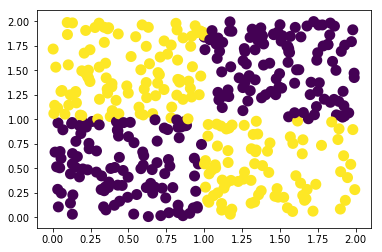

In [69]:
plt.scatter(xx_[:,0], xx_[:, 1], c=y.reshape(-1), lw=5)

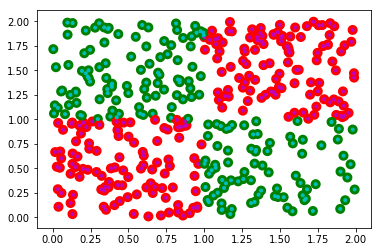

In [83]:
out = (pred1_).astype(int)
plt.scatter(xx_[:,0], xx_[:, 1], c=out.reshape(-1), marker='o', lw=4,
            cmap=matplotlib.colors.ListedColormap(['r', 'g']))
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='.', cmap=matplotlib.colors.ListedColormap(['m','c']))

In [72]:
np.abs(xx_ - x).mean()

1.0528229667822576e-05